<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [2]:
from bs4 import BeautifulSoup
import requests

##### Your Code Here #####
url = 'https://raw.githubusercontent.com/Daniel-Benson-Poe/DS-Unit-4-Sprint-1-NLP/master/module2-vector-representations/data/job_listings.csv'


In [3]:
job_listings = pd.read_csv(url, index_col=0)
job_listings.head()

,description,title
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [4]:
job_listings.shape

(426, 2)

In [5]:
def bs_cleaner(df):
    
    soup = BeautifulSoup(df)
    
    text = soup.get_text()
    
    return text

job_listings['cleaned_description'] = job_listings['description'].apply(bs_cleaner)

In [6]:
job_listings.head(20)

,description,title,cleaned_description
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,"b""Job Requirements:\nConceptual understanding ..."
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"b'Job Description\n\nAs a Data Scientist 1, yo..."
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,b'As a Data Scientist you will be working on c...
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen..."
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b'Location: USA \xe2\x80\x93 multiple location...
5,b'<div>Create various Business Intelligence An...,Data Scientist,b'Create various Business Intelligence Analyti...
6,b'<div><p>As Spotify Premium swells to over 96...,Associate Data Scientist – Premium Analytics,b'As Spotify Premium swells to over 96M subscr...
7,"b""Everytown for Gun Safety, the nation's large...",Data Scientist,"b""Everytown for Gun Safety, the nation's large..."
8,"b""<ul><li>MS in a quantitative discipline such...",Sr. Data Scientist,"b""MS in a quantitative discipline such as Stat..."
9,b'<div><p>Slack is hiring experienced data sci...,"Data Scientist, Lifecyle",b'Slack is hiring experienced data scientists ...


In [7]:
job_listings.tail(20)

,description,title,cleaned_description
406,b'<div><b>Job Description:</b><br/>\n<p><b>Dat...,Data Scientist,b'Job Description:\nData Scientist\nInteractiv...
407,b'<div><div><div><div><div>The Data Scientist ...,Data Scientist,b'The Data Scientist I mines and analyzes comp...
408,b'<div><p>FinLocker is a leading financial dat...,Data Scientist,b'FinLocker is a leading financial data and an...
409,"b'<div><p>With annual sales of $15 billion, Ec...",Data Scientist,"b'With annual sales of $15 billion, Ecolab (EC..."
410,b'<div>Job Description:<br/>\n<br/>\nThe Enter...,Data Scientist,b'Job Description:\n\nThe Enterprise Data Solu...
411,"b""<div>Description:\n<p>Chicago - IL, IL150SW,...",Data Scientist,"b""Description:\nChicago - IL, IL150SW, 150 S W..."
412,b'<div>Nike Supply Chain experts ensure that e...,"Data Scientist, Supply Chain Innovation",b'Nike Supply Chain experts ensure that every ...
413,b'<div><div>The Principal Data Scientist is re...,Principal Data Scientist,b'The Principal Data Scientist is responsible ...
414,b'<div><p>We are looking for a Senior Data Sci...,Data Scientist – Content Marketing Acquisition,b'We are looking for a Senior Data Scientist w...
415,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Marketing Data Science Intern - Summer 2019,"b'Temporary, Internship\nThe Marketing Data Sc..."


## 2) Use Spacy to tokenize the listings 

In [14]:
##### Your Code Here #####
import spacy
nlp = spacy.load('en_core_web_lg')

def tokenize(text):
    
    tokens = []
    doc = nlp(text.strip())
    
    for token in doc:
        if (token.is_stop==False) & (token.is_punct==False):
            tokens.append(token.text.lower())
    return tokens

In [15]:
test = job_listings['cleaned_description'].apply(tokenize)

In [16]:
test

0      [b"job, requirements:\nconceptual, understandi...
1      [b'job, description\n\nas, data, scientist, 1,...
2      [b'as, data, scientist, working, consulting, b...
3      [b'$4,969, $, 6,756, monthcontractunder, gener...
4      [b'location, usa, \xe2\x80\x93, multiple, loca...
                             ...                        
421    [b"about, us:\nwant, fantastic, fun, startup, ...
422    [b'internshipat, uber, ignite, opportunity, se...
423    [b'$200,000, $, 350,000, yeara, million, peopl...
424    [b"senior, data, scientist\njob, description\n...
425    [b'cerner, intelligence, new, innovative, orga...
Name: cleaned_description, Length: 426, dtype: object

In [17]:
job_listings['tokens'] = job_listings['cleaned_description'].apply(tokenize)
job_listings['tokens'].head()

0    [b"job, requirements:\nconceptual, understandi...
1    [b'job, description\n\nas, data, scientist, 1,...
2    [b'as, data, scientist, working, consulting, b...
3    [b'$4,969, $, 6,756, monthcontractunder, gener...
4    [b'location, usa, \xe2\x80\x93, multiple, loca...
Name: tokens, dtype: object

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [19]:
##### Your Code Here #####
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words='english', min_df=2, max_df=.95, ngram_range=(1,2), max_features=5000)
vect.fit(job_listings['cleaned_description'])

dtm = vect.transform(job_listings['cleaned_description'])

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

In [20]:
dtm

,000,000 employees,10,10 years,100,100 000,11,12,12 months,15,...,years related,years relevant,years work,years working,years xe2,yes,york,york city,yrs,zf
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
print(f"Number of features: {dtm.shape[1]}")

Number of features: 5000


In [25]:
row = dtm.mean(axis=1)
row

0      0.0190
1      0.0824
2      0.0196
3      0.0298
4      0.0064
        ...  
421    0.0884
422    0.0626
423    0.0562
424    0.0922
425    0.0934
Length: 426, dtype: float64

In [28]:
doc_len = [len(doc) for doc in job_listings['cleaned_description']]
doc_len

[837,
 4011,
 856,
 1740,
 237,
 2260,
 2312,
 4082,
 3229,
 3077,
 2205,
 3832,
 4822,
 2312,
 4517,
 3235,
 3733,
 913,
 4082,
 600,
 3102,
 3679,
 2183,
 5480,
 882,
 1309,
 1497,
 3315,
 4822,
 3888,
 3231,
 4781,
 4696,
 3880,
 3285,
 1811,
 6868,
 3755,
 1916,
 1777,
 3668,
 3656,
 773,
 2205,
 2689,
 1586,
 3108,
 1685,
 2005,
 3248,
 7591,
 2566,
 3436,
 2807,
 2353,
 7169,
 870,
 3124,
 1482,
 2204,
 4630,
 3605,
 2548,
 1833,
 3094,
 3976,
 3315,
 2630,
 4287,
 2230,
 2223,
 3499,
 1024,
 2688,
 5602,
 2663,
 3957,
 3729,
 2953,
 3589,
 1443,
 4003,
 2371,
 3932,
 2118,
 3668,
 2423,
 2111,
 2602,
 2421,
 7591,
 4156,
 5434,
 1179,
 2459,
 3077,
 1222,
 3585,
 3094,
 4092,
 1685,
 1286,
 3732,
 2715,
 2028,
 217,
 522,
 1773,
 2213,
 1835,
 3432,
 3535,
 3585,
 2023,
 434,
 3682,
 4966,
 6612,
 3571,
 2889,
 3794,
 3399,
 7169,
 5480,
 6456,
 2005,
 2332,
 1982,
 2055,
 4285,
 4547,
 3555,
 3432,
 1161,
 2095,
 5366,
 4722,
 4247,
 773,
 1593,
 3504,
 4524,
 3436,
 10402,
 37

## 4) Visualize the most common word counts

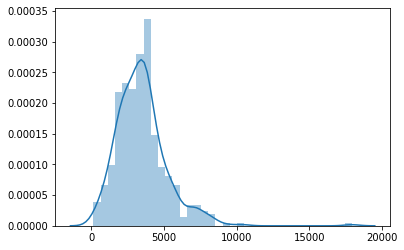

In [30]:
##### Your Code Here #####
import seaborn as sns

sns.distplot(doc_len);

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [31]:
##### Your Code Here #####
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', max_features=5000, ngram_range=(1,3))
dtm = tfidf.fit_transform(job_listings['cleaned_description'])

dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

dtm.head()

,000,000 employees,10,10 years,100,100 000,11,12,12 months,15,...,years relevant work,years work,years work experience,years xe2,years xe2 x80,yes,york,york city,yrs,zf
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
dtm.max(axis=1)

0      0.164199
1      0.150756
2      0.188720
3      0.416634
4      0.272746
         ...   
421    0.560769
422    0.335582
423    0.154470
424    0.264965
425    0.195223
Length: 426, dtype: float64

In [33]:
def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

In [35]:
tfidf = TfidfVectorizer(ngram_range=(1,3),
                       max_df=.97,
                       min_df=2,
                       tokenizer=tokenize,
                       max_features=5000)

dtm = tfidf.fit_transform(job_listings['cleaned_description'])

dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

dtm.head()

,$,+,+ year,+ year experience,+ year hand,+ year industry,+ year professional,+ year relevant,+ year work,+ years\xe2\x80\x99,...,york city,you\'ll,you\xe2\x80\x99ll,you\xe2\x80\x99ll work,you\xe2\x80\x99re,you\xe2\x80\x99ve,yrs,zf,|,||
0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.031219,0.034089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.186836,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.135861,0.148350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
list(dtm[:100])

['$',
 '+',
 '+ year',
 '+ year experience',
 '+ year hand',
 '+ year industry',
 '+ year professional',
 '+ year relevant',
 '+ year work',
 '+ years\\xe2\\x80\\x99',
 '+ years\\xe2\\x80\\x99 experience',
 '1',
 '1 year',
 '1 year experience',
 '10',
 '100',
 '100,000',
 '12',
 '12 month',
 '15',
 '2',
 '2 +',
 '2 + year',
 '2 year',
 '2 year experience',
 '2 years\\xe2\\x80\\x99',
 '20',
 '2019',
 '25',
 '3',
 '3 +',
 '3 + year',
 '3 5',
 '3 year',
 '3 year experience',
 '3.0',
 '30',
 '3rd',
 '3rd party',
 '4',
 '4 year',
 '4 year experience',
 '40',
 '401(k',
 '401k',
 '5',
 '5 +',
 '5 + year',
 '5 year',
 '5 year experience',
 '5 year relevant',
 '50',
 '500',
 '6',
 '600',
 '600 city',
 '600 city world.\\n\\nwe',
 '7',
 '7 year',
 '7 year experience',
 '8',
 '\\xe2\\x80\\x93',
 '\\xe2\\x80\\x93 happen',
 '\\xe2\\x80\\x94',
 '\\xe2\\x80\\x9cbig',
 '\\xe2\\x80\\x9cbig data\\xe2\\x80\\x9d',
 '\\xe2\\x80\\x9cbig data\\xe2\\x80\\x9d source',
 'aa',
 'aa employer',
 'ab',
 'ability',
 

In [37]:
dtm.shape

(426, 5000)

## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [38]:
##### Your Code Here #####
dtm.head()

,$,+,+ year,+ year experience,+ year hand,+ year industry,+ year professional,+ year relevant,+ year work,+ years\xe2\x80\x99,...,york city,you\'ll,you\xe2\x80\x99ll,you\xe2\x80\x99ll work,you\xe2\x80\x99re,you\xe2\x80\x99ve,yrs,zf,|,||
0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.031219,0.034089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.186836,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.135861,0.148350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [41]:
nn.kneighbors([dtm.iloc[323]])

(array([[0.        , 0.        , 1.25501715, 1.2607399 , 1.2607399 ]]),
 array([[323, 141, 287,  13,   6]]))

In [44]:
my_desc = ["""
          Neurotechology and machine learning within a biological and data science cross-collaborative platform. 
          This includes neural networks, artificial intelligence, biology, neuroscience, data science, Python programming, etc.
          """]

In [45]:
my_desc_tfid = tfidf.transform(my_desc)

In [46]:
my_desc_tfid

<1x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 19 stored elements in Compressed Sparse Row format>

In [47]:
nn.kneighbors(my_desc_tfid.todense())

(array([[1.27966121, 1.28839443, 1.29492702, 1.30269005, 1.30537886]]),
 array([[399, 145,  51, 410, 151]]))

In [48]:
# Inspect most relevant result
job_listings['cleaned_description'][399]

"b'By trade we are a technology company, but if you ask anyone that works here, they\\xe2\\x80\\x99ll tell you we are a people company. As the industry leader in Accounts Payable (AP) Automation, AvidXchange strives to provide an innovative and collaborative work environment. We do that through focusing on our people, our culture, and ensuring we run our business in a way that enables every employee to achieve their fullest potential and help us create a world class company. Our employees live by our core values, including \\xe2\\x80\\x9cInnovate to Change the Game,\\xe2\\x80\\x9d \\xe2\\x80\\x9cPassion About Customer Success,\\xe2\\x80\\x9d \\xe2\\x80\\x9cWin as a Team,\\xe2\\x80\\x9d and \\xe2\\x80\\x9cHave a Blast.\\xe2\\x80\\x9d Whether you live in Charlotte and can enjoy our corporate campus at the AvidXchange Music Factory, or you live across the country, AvidXchange has locations waiting for you. We are on a mission to create something different at AvidXchange . Love where you w

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 